In [1]:
import sys
sys.path.append('../../')

In [2]:
import libtiff
import imageio
import PIL
import numpy as np
import matplotlib.pyplot as plt
import fastai as fai
import fastai.vision as faiv
import fastai.callbacks as faic
import data.utils
import data.svd

In [3]:
# Modify accordingly
path = faiv.Path('/home/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/')

# dataset_name = 'real-world_SEM'

lr_name = f'training/trainsets/crappified/'
lr_path = path/f'{lr_name}'
lr_files = sorted(list(lr_path.glob('*.tif')))

hr_name = f'training/trainsets/hr/'
hr_path = path/f'{hr_name}'
hr_files = sorted(list(hr_path.glob('*.tif')))

print('Processing '+str(len(lr_files))+' files...')

Processing 99997 files...


In [31]:
# Set size for visualizations
fig_size = plt.rcParams["figure.figsize"]  # Get current size
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 24
plt.rcParams["figure.figsize"] = fig_size

Current size: [30.0, 12.0]


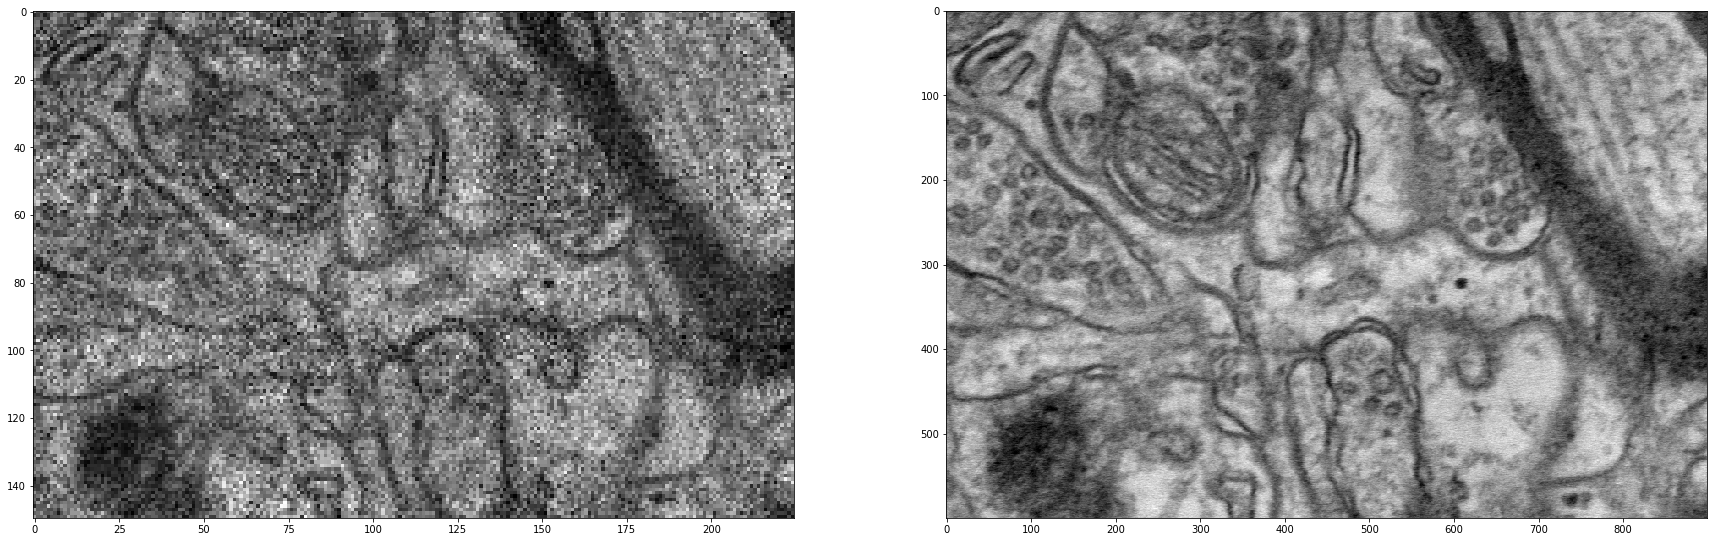

In [32]:
sn = 8 # image number
lr_im = data.utils.load_img(lr_files[sn]) # load image to tensor
hr_im = data.utils.load_img(hr_files[sn]) # load image to tensor
f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(np.squeeze(lr_im), cmap=plt.cm.gray) # visualize image tensor
axarr[1].imshow(np.squeeze(hr_im), cmap=plt.cm.gray) # visualize image tensor
plt.show() # show visualizationiff.

In [6]:
data.utils.save_img(hr_im, "hr_test.tif")

In [14]:
svd_im = data.svd.compute_svd(hr_im, k=30)

../../data/svd.py:23: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(np.flip(eigvals))


In [ ]:
def svd_process(img_files, output_dir, k):
    for img_fn in img_files:
        img = data.utils.load_image(img_fn)
        svd_im = data.svd.compute_svd(img, k=k)
        data.utils.save_img(svd_in, output_dir+img_fn)

# Questions for Andrew
- how to parallelize the SVD process function?
- if we can parallelize, how am I supposed to save them to file?

In [7]:
hr_im.shape

(1, 600, 900)

In [16]:
svd_im = svd_im[np.newaxis, :]

In [ ]:
# Go with HR SVD k=35-40

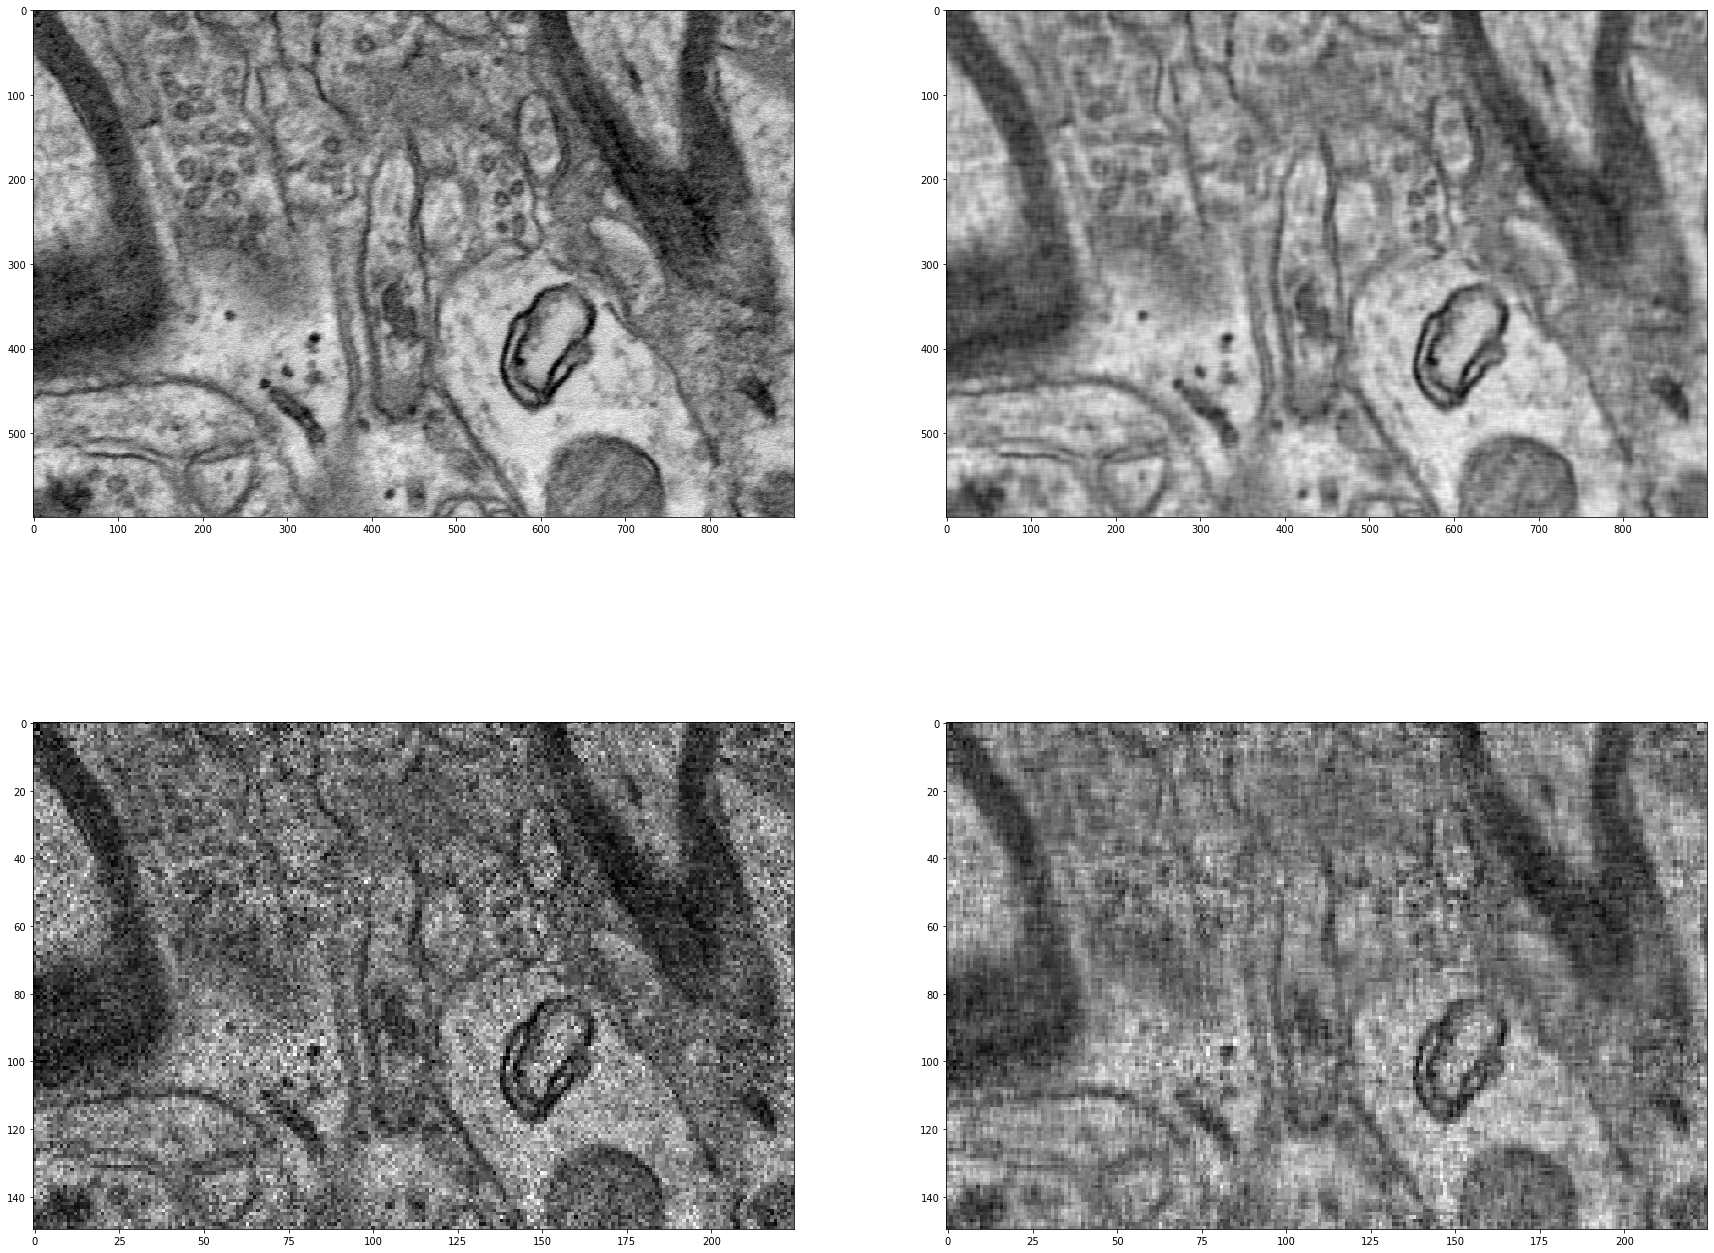

In [38]:
sn = 9 # image number
k1 = 30
k2 = 40
hr_im = data.utils.load_img(hr_files[sn])  # load HR image to tensor
lr_im = data.utils.load_img(lr_files[sn])  # load LR image to tensor
svd_lr_im = data.svd.compute_svd(lr_im, k=k1)  # compute svd image
svd_hr_im = data.svd.compute_svd(hr_im, k=k2)  # compute svd image
f, axarr = plt.subplots(2,2) # create visualizations
axarr[0][0].imshow(np.squeeze(hr_im), cmap=plt.cm.gray) # visualize image tensor
axarr[0][1].imshow(np.squeeze(svd_hr_im), cmap=plt.cm.gray)  # visualize image tensor
axarr[1][0].imshow(np.squeeze(lr_im), cmap=plt.cm.gray)  # visualize image tensor
axarr[1][1].imshow(np.squeeze(svd_lr_im), cmap=plt.cm.gray)  # visualize image tensor

plt.show() # show visualization

In [17]:
data.utils.save_img(svd_im, "svd_test.tif")

In [20]:
t = img_to_uint8(hr_im)

In [26]:
imageio.mimwrite("test.tiff", t, )

In [25]:
hr_files[sn]

PosixPath('/home/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/hr/EM_train_hr_00009.tif')

In [30]:
im = PIL.Image.fromarray(np.squeeze(t))

In [31]:
im.save('test2.tif')

In [55]:
img = libtiff.TiffFile(hr_files[sn])

NotImplementedError: 'rgb'

In [50]:
t = img.get_tiff_array()[0]

In [51]:
t.shape

(600, 900)

# Load and Write using PIL (RGB)

In [59]:
im = PIL.Image.open(hr_files[sn])

In [60]:
im.load()

In [63]:
im

'RGB'

In [64]:
im.save('test3.tif')